# Linear Data Simulation and Fit
This notebook creates linear data with noise and fits it. The residuals of the fit and their distribution is also displayed. 
 <hr style="border-top: 2px double #8c8b8b;"/>
This code generates a line $f(x)= m\times x+b$, from X_MIN to X_MAX with a random number added from a gaussian distribution with zero mean.
 <hr style="border-top: 2px double #8c8b8b;"/>
Uses packages
1. [numpy][np]
1. [scipy][sp]
1. [matplotlib][plt] 
2. [ipwidgets][ip]
3. [random][rd]
4. [types][types]
5. [math][math]
<br/>
<hr style="border-top: 2px double #8c8b8b;"/>

Example output :
<br/>
__Output of interact_with_plot()__
<table>
<tr>
<th>
Linear Plot With Small Noise and Negative Slope
</th>
<th>
Linear Plot With Large Noise and Positive Slope
</th>
</tr>
<tr>
<td>
<img src="./Python_Introduction_Images/example_plot_3.png"/>
</td>
<td>
<img src="./Python_Introduction_Images/example_plot_4.png" />
</td>
</table>
<br/>
__Output of interact_with_residuals()__
<table>
<tr>
<th>
Linear Plot And Residuals With No Noise and Positive Slope
</th>
<th>
Linear Plot With  Noise and Positive Slope
</th>
</tr>
<tr>
<td>
<img src="./Python_Introduction_Images/example_plot_1.png"/>
</td>
<td>
<img src="./Python_Introduction_Images/example_plot_2.png" />
</td>
</table>

[np]:http://docs.scipy.org/doc/numpy/reference/?v=20160706100716
[sp]:http://docs.scipy.org/doc/scipy/reference/?v=20160706100716
[plt]:http://matplotlib.org/contents.html?v=20160706100716
[rd]:https://docs.python.org/2.7/library/random.html?highlight=random#module-random
[ip]:http://ipywidgets.readthedocs.io/en/latest/
[types]:https://docs.python.org/2/library/types.html
[math]:https://docs.python.org/2/library/math.html

In [1]:
# import needed libraries
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
from ipywidgets import *
import random
from types import *
import math

# Define Constants
# Constants that determine the span of the line in the x-axis
X_MIN=-10
X_MAX=10

# Define Functions

# Define a function that finds the optimized least squared fit to a function
def fit(function,xdata,ydata,a0):
    "Fit returns a least square fit "
    error_function=lambda a, xdata, ydata:function(a,xdata)-ydata
    a,success=so.leastsq(error_function, a0,args=(xdata,ydata))
    return a

# Define a linear function
def line_function(a,x):
    "line function (y=a[1]x+a[0])"
    return a[1]*x+a[0]

# Define a function that finds residuals given a fit function and fit parameters and an original data set
def find_residuals(fit_function,fit_parameters,x_data,y_data):
    """Returns the residuals for a fit"""
    if type(x_data) in [np.ndarray,ListType]:
        output=map(lambda x:fit_function(fit_parameters,x),x_data)
        if type(y_data) is not ListType:
            raise 
        output=[f_x-y_data[index] for index,f_x in enumerate(output)]
    elif type(x_data) is FloatType:
        output=fit_function(fit_parameters,x_data)-y_data
    else:
        output=None
    return output

# Define a function to plot a line and a fit through that line
def plot_line(noise_magnitude,number_points,slope,intercept):
    "A function to plot a line with noise"
    data_list=np.linspace(X_MIN,X_MAX,number_points)
    y_data=[slope*x+intercept+random.gauss(0,noise_magnitude) for x in data_list]
    results=fit(line_function,data_list,y_data,[1,0])
    y_fit=[line_function(results,x) for x in data_list]
    #plot the data
    plt.plot(data_list,y_data,'ob')
    #plot the fit
    plt.plot(data_list,y_fit,'r-',linewidth=5)
    ax=plt.gca()
    ax.set_ylim(-300,300)
    ax.set_title('y = {0:3.2f} x + {1:3.2f}'.format(results[1],results[0]))
    plt.show()

# Define a plotting function that shows a line, a fit through that line, the residuals of the fit and a histogram 
# of those residuals
def plot_residuals(noise_magnitude,number_points,slope,intercept):
    "A function to plot a line with noise and the residuals of that fit including a histogram of those residuals"
    data_list=np.linspace(X_MIN,X_MAX,number_points)
    y_data=[slope*x+intercept+random.gauss(0,noise_magnitude) for x in data_list]
    results=fit(line_function,data_list,y_data,[1,0])
    y_fit=[line_function(results,x) for x in data_list]
    #plot the data
    # Comment this line to change the plot layout
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)
    
    # Uncomment these lines to change the laytout
#     fig = plt.figure()
#     ax0 = plt.subplot(221)
#     ax1 = plt.subplot(223)
#     ax2 = plt.subplot(122)

    ax0.plot(data_list,y_data,'ob')
    # plot the fit
    ax0.plot(data_list,y_fit,'r-',linewidth=5)
    ax0.set_ylim(-300,300)
    ax0.set_title('y = {0:3.2f} x + {1:3.2f}'.format(results[1],results[0]))
    # find the residuals
    residuals=find_residuals(line_function,results,data_list,y_data)
    # plot the residuals
    ax1.plot(data_list,residuals,'r^')
    ax1.set_ylim(-100,100)
    # plot a histogram of the residuals
    ax2.hist(residuals,bins=int(math.floor(math.sqrt(number_points))))
    ax2.set_ylim(0,100)
    ax2.set_xlim(-200,200)
    # set the plot titles
    ax1.set_title('Residuals')
    ax2.set_title('Residual Distrubution')
    # display
    plt.tight_layout()
    plt.show()
    

# define scripts calling these create interactive plots 
def interact_with_plot():
    %matplotlib inline
    interact(plot_line,noise_magnitude=(0,100,1),number_points=(10,1000,10),slope=(-30,30,.1),intercept=(-200,200,1))

# Test the find_residuals function
def residual_script():
    data_list=np.linspace(X_MIN,X_MAX,1000)
    y_data=[5*x+10+random.gauss(0,5) for x in data_list]
    results=fit(line_function,data_list,y_data,[1,0])
    print find_residuals(line_function,results,data_list,y_data)
    
def interact_with_residuals():
    %matplotlib inline
    interact(plot_residuals,noise_magnitude=(0,100,1),
             number_points=(10,1000,10),slope=(-30,30,.1),intercept=(-200,200,1))

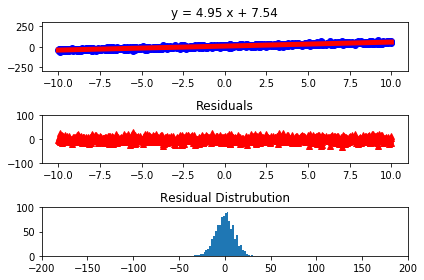

In [2]:
#%matplotlib notebook
plot_residuals(10,1000,5,7)

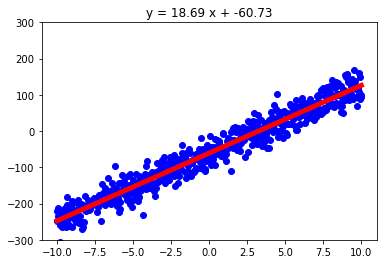

In [3]:
interact_with_plot()

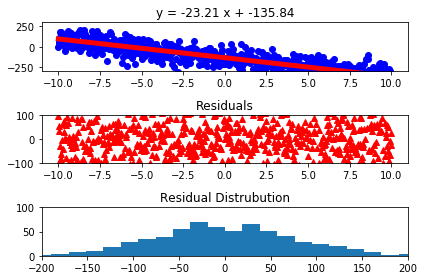

In [4]:
interact_with_residuals()